In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)


In [6]:
# View all of the classes that automap found
Base.classes.keys()

['station', 'measurement']

In [7]:
# Save references to each table
hawaii_measurement = Base.classes.measurement
hawaii_station_surf = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
print(dt.date(2017, 8, 23))



2017-08-23


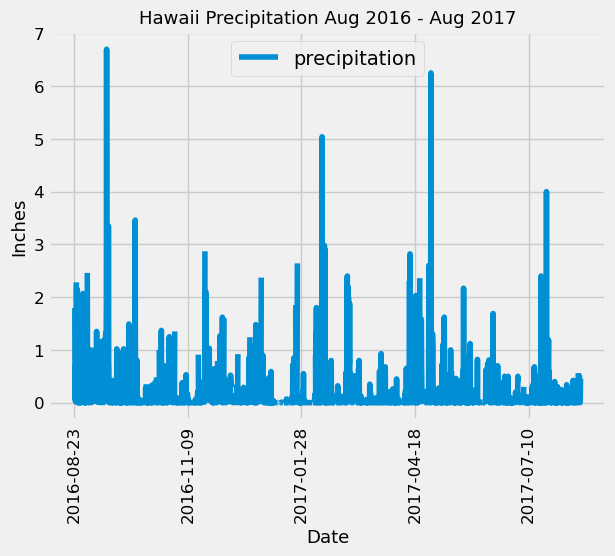

In [10]:





# Design a query to retrieve the last 12 months of precipitation data and plot the results.
#Starting from the last data point in the database.
last_year = dt.date(2017, 8, 23)
# Calculate the date one year from the last date in data set.
last_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)
# Perform a query to retrieve the data and precipitation scores
que_d = session.query(hawaii_measurement.date, hawaii_measurement.prcp)
# Save the query results as a Pandas DataFrame and set the index to the date column
que_d = session.query(hawaii_measurement.date, hawaii_measurement.prcp).filter(hawaii_measurement.date >= last_year).all()
prcp_df = pd.DataFrame(que_d, columns=['date','precipitation'])
prcp_df.set_index(prcp_df['date'], inplace=True)
prcp_df = prcp_df.sort_index()
# Use Pandas Plotting with Matplotlib to plot the data
prcp_df.plot()
plt.xlabel("Date",  size = 13)
plt.ylabel("Inches", size = 13)
plt.title("Hawaii Precipitation Aug 2016 - Aug 2017", size = 13)
plt.legend(["precipitation"],loc='upper center')
plt.xticks(rotation=90, size = 12)
plt.yticks(size = 12)
plt.show()

In [11]:
# Use Pandas to calculate the summary statistics for the precipitation data
prcp_df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number of stations in the dataset
station_count = session.query(func.count(hawaii_station_surf.station)).scalar()
print(station_count)

9


In [13]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_stations = session.query(hawaii_measurement.station, func.count(hawaii_measurement.station)).\
group_by(hawaii_measurement.station).\
order_by(func.count(hawaii_measurement.station).desc()).all()
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
lowest_temp = (session.query(func.min(hawaii_measurement.tobs))
.filter(hawaii_measurement.station == 'USC00519281').scalar())
print(lowest_temp)

highest_temp = (session.query(func.max(hawaii_measurement.tobs))
.filter(hawaii_measurement.station == 'USC00519281').scalar())
print(highest_temp)

avg_temp = (session.query(func.avg(hawaii_measurement.tobs))
.filter(hawaii_measurement.station == 'USC00519281').scalar())
print(avg_temp)

54.0
85.0
71.66378066378067


2017-08-18


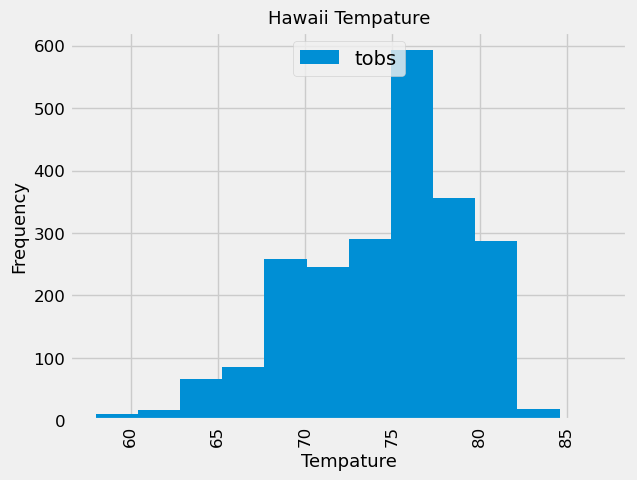

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
highest_temp2 = (session.query(func.max(hawaii_measurement.date))
.filter(hawaii_measurement.station == 'USC00519281').scalar())
print(highest_temp2)
# Calculate the date one year from the last date in data set.
temp_last = dt.date(2017, 8, 18) - dt.timedelta(days=365)
# Perform a query to retrieve the data and precipitation scores
meas  = session.query(hawaii_measurement.date, hawaii_measurement.tobs)
# Save the query results as a Pandas DataFrame and set the index to the date column
meas = session.query(hawaii_measurement.date, hawaii_measurement.tobs).filter(hawaii_measurement.date >= last_year).all()
temp1 = pd.DataFrame(meas, columns=['date','precipitation'])
temp1.set_index(temp1['date'], inplace=True)
temp1 = temp1.sort_index()
# Use Pandas Plotting with Matplotlib to plot the data
temp1.plot.hist(bins = 12)

plt.xlabel("Tempature",  size = 13)
plt.ylabel("Frequency", size = 13)
plt.title("Hawaii Tempature", size = 13)
plt.legend(["tobs"],loc='upper center')
plt.xticks(rotation=90, size = 12)
plt.yticks(size = 12)
plt.show()


# Close Session

In [16]:
# Close Session
session.close()